## Imports

In [22]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## Do what you need to do to create a graph like this:

## Create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits

In [23]:
ab_df = pd.read_csv('../data/ab-test.csv')
ab_df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [24]:
ab_df.tail()

,uid,diff,time,group
39,user_4,-228.000000,before,control
40,user_6,-93.333333,after,control
41,user_6,-16.500000,before,control
42,user_8,-142.333333,after,control
43,user_8,-187.500000,before,control


In [25]:
ab_df = pd.read_csv('../data/ab-test.csv')
ab_df = ab_df.loc[ab_df.group == 'test']
ab_df.rename(columns={'diff': 'avg_diff'}, inplace=True)
ab_df.drop(columns=['time', 'group'], inplace=True)
ab_df

,uid,avg_diff
0,user_1,-103.333333
1,user_1,-6.000000
2,user_18,-10.000000
3,user_18,-3.500000
4,user_19,-82.333333
5,user_19,-148.000000
6,user_21,-78.500000
7,user_21,-112.500000
8,user_25,-127.500000
9,user_25,-69.333333


In [26]:
ab_df = ab_df.groupby('uid').mean()
ab_df

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667
user_28,-94.750000
user_3,-114.250000


## • do not take project1 into account for calculations of the average difference and the number of commits
• take the number of commits from the checker table

In [27]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [31]:
sel = """
SELECT uid, COUNT(timestamp) AS commits FROM checker
WHERE checker.uid LIKE 'user_%' 
    AND checker.labname != 'project1'
GROUP BY uid;"""

com_count_df = pd.read_sql(sel, conn, index_col='uid')
com_count_df.head()

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86


In [34]:
sel = """
SELECT uid, COUNT(datetime) AS pageviews FROM pageviews
WHERE pageviews.uid LIKE 'user_%'
GROUP BY uid;"""

usr_count_db = pd.read_sql(sel, conn, index_col='uid')
usr_count_db.head()

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3


In [40]:
tot_df = pd.concat([ab_df, usr_count_db, com_count_df], axis='columns', join='inner')
tot_df

,avg_diff,pageviews,commits
uid,,,
user_1,-54.666667,28,62
user_18,-6.750000,3,5
user_19,-115.166667,16,118
user_21,-95.500000,10,65
user_25,-98.416667,179,79
user_28,-94.750000,149,60
user_3,-114.250000,317,18


## The figsize is still the same, you can choose whatever fontsize you like as well as the color palette
• the size of the dots should be 200
• the width of the lines of the diagonal graphs (kde) should be 3

array([[<AxesSubplot:xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='commits', ylabel='avg_diff'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot:xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot:xlabel='commits', ylabel='pageviews'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='commits'>,
        <AxesSubplot:xlabel='pageviews', ylabel='commits'>,
        <AxesSubplot:xlabel='commits', ylabel='commits'>]], dtype=object)

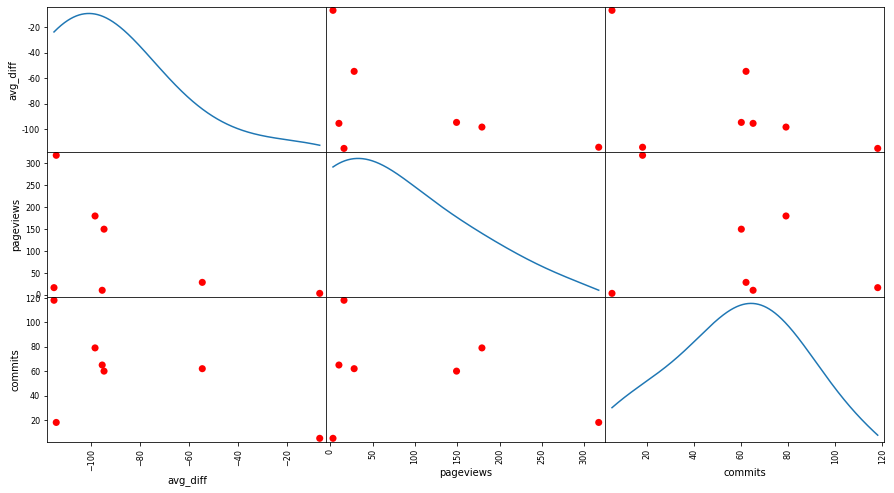

In [37]:
scatter_matrix(tot_df,
			   alpha=1, 
			   figsize = (15, 8), 
			   diagonal = 'kde', 
			   s=200, 
			   linewidth=3, 
			   color='red')

## Disconnect database

In [38]:
conn.close()

## ◦ “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.

No

## ◦ “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no.

No


## ◦ “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.

Yes


## ◦ “Can we say that there are many users with a small average difference and a few with a large average difference”? The answer: yes or no.

No